<a href="https://colab.research.google.com/github/nattasit1/6680737/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

# Homework

## Problem 1

Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

In [ ]:
def f(x):
    return x - math.exp(-x)

def bisect(f, a, b, tol):
    if f(a) * f(b) > 0:
        print("No root found.")
        return None
    while (b-a)/2 > tol:
        midpoint = (a + b) / 2
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
    return midpoint

a = 0
b = 1
tolerance = 1e-6
solution = bisect(f, a, b, tolerance)
print("Solution: x = ", solution)


Solution: x =  0.5671443939208984


## Problem 2
Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 -
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$

Make sure your answers are at most $10^{-6}$ away from the real solution.

In [ ]:
def f(x):
    return (-0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 -
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7)

def bisection_method(a, b, tol):
    if f(a) * f(b) >= 0:
        print(f"No root in interval [{a}, {b}] or endpoints are not suitable.")
        return None

    while (b - a) / 2.0 > tol:
        midpoint = (a + b) / 2.0
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

    return (a + b) / 2.0

def find_roots_in_interval(start, end, tol, step=0.01):
    roots = []
    a = start
    while a < end:
        b = a + step
        if f(a) * f(b) < 0:
            root = bisection_method(a, b, tol)
            if root is not None:
                roots.append(root)
        a = b
    return roots

# Define the interval and tolerance
start = 0
end = 1
tolerance = 1e-6

# Find all roots in the interval [0, 1]
roots = find_roots_in_interval(start, end, tolerance)

# Print the roots
print("Roots in [0, 1]:")
for root in roots:
    print(f"{root:.8f}")

Roots in [0, 1]:
0.12216614
0.22002869
0.33329895
0.78540955


2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

In [ ]:
def f(x):
    return (-0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 -
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7)

def f_prime(x):
    return (0.0072868 - 0.1954766*x + 1.994055*x**2 - 9.63092*x**3 +
            22.3383*x**4 - 22.2546*x**5 + 7*x**6)

def f_double_prime(x):
    return (-0.1954766 + 3.98811*x - 28.89276*x**2 + 89.3532*x**3 -
            111.273*x**4 + 42*x**5)

def bisection_method(a, b, tol, func):
    if func(a) * func(b) >= 0:
        return None

    while (b - a) / 2.0 > tol:
        midpoint = (a + b) / 2.0
        if func(midpoint) == 0:
            return midpoint
        elif func(a) * func(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

    return (a + b) / 2.0

def find_critical_points(start, end, tol=1e-6, step=0.01):
    critical_points = []
    a = start
    while a < end:
        b = a + step
        if f_prime(a) * f_prime(b) < 0:
            root = bisection_method(a, b, tol, f_prime)
            if root is not None:
                critical_points.append(root)
        a = b
    return critical_points

# Define the interval and tolerance
start = 0
end = 1
tolerance = 1e-6

# Find all critical points in the interval [0, 1]
critical_points = find_critical_points(start, end, tolerance)

# Determine the nature of each critical point
for point in critical_points:
    second_derivative = f_double_prime(point)
    if second_derivative > 0:
        print(f"Local minimum at x = {point:.8f}")
    elif second_derivative < 0:
        print(f"Local maximum at x = {point:.8f}")
    else:
        print(f"Test inconclusive at x = {point:.8f}")

Local maximum at x = 0.19136780
Local minimum at x = 0.29709167
Local maximum at x = 0.68178040


2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

In [ ]:
def f(x):
    return (-0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 -
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7)

def f_prime(x):
    return (0.0072868 - 0.1954766*x + 1.994055*x**2 - 9.63092*x**3 +
            22.3383*x**4 - 22.2546*x**5 + 7*x**6)

def find_critical_points(start, end, tol=1e-6, step=0.01):
    critical_points = []
    a = start
    while a < end:
        b = a + step
        if f_prime(a) * f_prime(b) < 0:
            root = bisection_method(a, b, tol, f_prime)
            if root is not None:
                critical_points.append(root)
        a = b
    return critical_points

def bisection_method(a, b, tol, func):
    if func(a) * func(b) >= 0:
        return None

    while (b - a) / 2.0 > tol:
        midpoint = (a + b) / 2.0
        if func(midpoint) == 0:
            return midpoint
        elif func(a) * func(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

    return (a + b) / 2.0


start = 0
end = 1
tolerance = 1e-6

critical_points = find_critical_points(start, end, tolerance)

#Evaluate the function at critical points and endpoints
evaluation_points = critical_points + [start, end]
function_values = [f(point) for point in evaluation_points]

global_max = max(function_values)
global_min = min(function_values)

# Find the corresponding x values
max_x = evaluation_points[function_values.index(global_max)]
min_x = evaluation_points[function_values.index(global_min)]

print(f"Global maximum: f({max_x:.8f}) = {global_max:.8f}")
print(f"Global minimum: f({min_x:.8f}) = {global_min:.8f}")

Global maximum: f(0.68178040) = 0.00382581
Global minimum: f(1.00000000) = -0.07515325


## Problem 3
In quantum physics, when finding a bound state for a finite potential well one would end up with the following equation(Yes E is negative):

$$
\sqrt{\frac{-E}{E+V_0}} = \tan \sqrt{2m \frac{E+V_0}{\hbar^2} a}
$$

The goal is to find all Energy($E$) that satisfy this equation.
For simplicity, let
- $V_0 = 1$
- $m = 1$
- $a = 1$
- $\hbar = 1$(Yes this is called natural unit)

$$
    \sqrt{\frac{-E}{E+1}} = \tan \sqrt{2(E+1)}
$$

Find the value for $E\in (-1.0, 0)$ which satisfy the equation above). Make sure you accuracy is $<\pm10^{-4}$


In [ ]:
def f(E):
    return math.sqrt(-E / (E + 1)) - math.tan(math.sqrt(2 * (E + 1)))

def bisection_method(f, a, b, tol):
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

a = -0.999
b = -0.001
tolerance = 1e-4
energy = bisection_method(f, a, b, tolerance)
print(f"The energy E is approximately: {energy}")

The energy E is approximately: -0.6038568115234375


## Problem 4
Ply quit programming and decide to be a Apple(fruit) shop owner. He bought 1000 apples everyday and try to sell it. The probability $k$ customer want Ply's apple(one each) is given by Poisson distribution:

$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Where $\lambda$ is an parameter that represent the mean of number of people that want Ply's apple each day.

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

The goal for this problem is to figure out how he should change the number of apples he bought in a day.

- In case you are curious https://en.wikipedia.org/wiki/Poisson_distribution. The true distribution of this selling apple process should be binomial distribution but with large enough customer and low enough probability of an individual buying an apple this is an excellent approximatoin.

4.1) You may find that if you try to code poisson distribution directly. It will not work with large number.
$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Explain briefly why python complains

In [11]:
import math
from scipy.stats import poisson
def bad_poisson(lmd, k):
    return pow(lmd,k)*math.exp(-lmd)/math.factorial(k)
# bad_poisson(1000,1000) # uncomment to see it breaks

def good_poisson(Ind, k):
    return poisson.pmf(k, Ind)

lambda_value = 1000
k = 1000

print(good_poisson(lambda_value, k))

0.01261461134870819


4.2) A very useful trick to avoid this problem is to take log and exponentiate. That is

$$
    P(k; \lambda) = \exp\left( \ln \left[ \frac{\lambda^k \exp(-\lambda)}{k!} \right] \right)
$$

First, show that
$$
    \ln(P(k; \lambda)) = (\ldots \ln(\ldots)-\ldots)-\ln(k!)
$$



In [12]:
def f(lmd, k):
  return k*math.log(lmd)-lmd-math.log(math.factorial(k))
print(f(1000,1000))


-4.372899506026442


4.3) $\ln(k!)$ shows up everywhere in math. So most math library have `lgamma` function to compute this very fast.
For example,

`math.lgamma(5) == math.log(math.factorial(4))`

Your job for this problem is to implement $P(k; \lambda)$ using log-exp trick.

If you do it right, $P(k=1000; \mu=1000) \approx 0.0126146$

In [13]:
import math

def poisson_pmf(k, lambda_):
    if k < 0 or lambda_ <= 0:
        return 0.0
    log_p = k * math.log(lambda_) - lambda_ - math.lgamma(k + 1)
    return math.exp(log_p)

# Example usage
k = 1000
lambda_ = 1000
probability = poisson_pmf(k, lambda_)
print(f"P(k = {k}; λ = {lambda_}) ≈ {probability:.7f}")

P(k = 1000; λ = 1000) ≈ 0.0126146


4.4) Now here is the fun part. Suppose that $\lambda = 987.6$(this is not true). Find the probability that Ply will sell all his 1000 apples. (Remember if 2000 people want Ply's apple, he his apple will also be sold out).

And No, summing up to infinity is not practical.

In [14]:
import math

def poisson_pmf(k, lambda_):
    if k < 0 or lambda_ <= 0:
        return 0.0
    log_p = k * math.log(lambda_) - lambda_ - math.lgamma(k + 1)
    return math.exp(log_p)

def poisson_cdf(k_max, lambda_):
    return sum(poisson_pmf(k, lambda_) for k in range(k_max + 1))

# Parameters
lambda_ = 987.6
k_threshold = 1000

# Calculate the probability of selling all 1000 apples
probability_sell_out = 1 - poisson_cdf(k_threshold - 1, lambda_)

print(f"Probability of selling all 1000 apples: {probability_sell_out:.7f}")

Probability of selling all 1000 apples: 0.3507847


4.5) Recall the information that

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

Find the value for $\lambda$ to a decent accuracy($<\pm 0.1$)

In [15]:
import math
from scipy.optimize import minimize_scalar

def poisson_pmf(k, lambda_):
    if k < 0 or lambda_ <= 0:
        return 0.0
    log_p = k * math.log(lambda_) - lambda_ - math.lgamma(k + 1)
    return math.exp(log_p)

def poisson_cdf(k_max, lambda_):
    return sum(poisson_pmf(k, lambda_) for k in range(k_max + 1))

def objective_function(lambda_):
    # Compute the probability of selling out
    prob_sell_out = 1 - poisson_cdf(999, lambda_)
    # We want this probability to be close to 0.3
    return abs(prob_sell_out - 0.3)

# Find the value of lambda that minimizes the objective function
result = minimize_scalar(objective_function, bounds=(900, 1100), method='bounded')

# The optimal lambda value
lambda_opt = result.x
print(f"Optimal lambda: {lambda_opt:.4f}")

Optimal lambda: 983.1784


4.6) Using $\lambda$ you found in 4.5).

Ply bounght apple for 20 Baht each and he sell it for 50 Baht each. Which means that for each apple he sells he make a profit of 30 baht. But, at the end of each day Ply has to trash all unsold Apples(taking a loss of 20 Baht each).

If Ply bought 1000 apples a day, what would be his expected profit(remember expected value from discrete math/stat/quantum?).

In [16]:
# Assuming lambda_opt is the value found in problem 4.5
lambda_opt = 987.6  # Replace with the actual value found

# Constants
apples_bought = 1000
profit_per_sold = 30
loss_per_unsold = 20

# Expected number of apples sold
expected_sold = lambda_opt

# Expected number of apples unsold
expected_unsold = apples_bought - expected_sold

# Expected profit
expected_profit = (expected_sold * profit_per_sold) - (expected_unsold * loss_per_unsold)

print(f"Expected Profit: {expected_profit:.2f} Baht")

Expected Profit: 29380.00 Baht


4.7) Using $\lambda$ you found in 4.5) Find the number of apple Ply should buy in a day to maximize his expected profit.

In [17]:
import math
from scipy.stats import poisson

# Assuming lambda_opt is the value found in problem 4.5
lambda_opt = 987.6  # Replace with the actual value found

# Constants
profit_per_sold = 30
loss_per_unsold = 20

def expected_profit(n, lambda_):
    # Expected number of apples sold is the minimum of n and lambda
    expected_sold = min(n, lambda_)
    # Expected number of apples unsold is max(0, n - lambda)
    expected_unsold = max(0, n - lambda_)
    # Calculate expected profit
    return (expected_sold * profit_per_sold) - (expected_unsold * loss_per_unsold)

# Search for the optimal n
max_profit = -float('inf')
optimal_n = 0

# Search range around lambda_opt
for n in range(int(lambda_opt - 100), int(lambda_opt + 100)):
    profit = expected_profit(n, lambda_opt)
    if profit > max_profit:
        max_profit = profit
        optimal_n = n

print(f"Optimal number of apples to buy: {optimal_n}")
print(f"Maximum expected profit: {max_profit:.2f} Baht")

Optimal number of apples to buy: 988
Maximum expected profit: 29620.00 Baht


## Problem 5

Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a the distribution is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum.

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

Text(0, 0.3, 'FWHM')

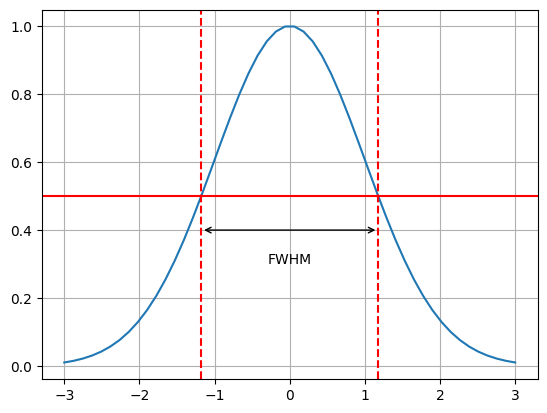

In [18]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')

5.1)Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

FWHM: 6.2


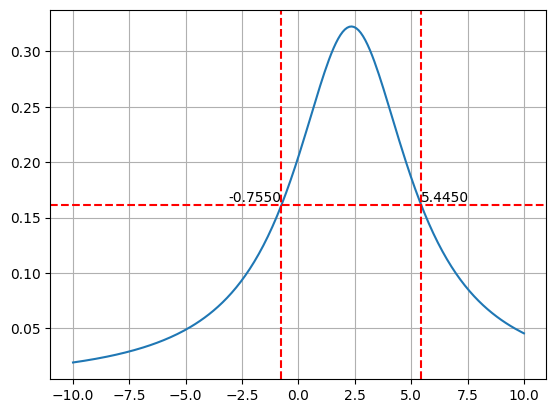

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve

def f(x, gamma=3.1):
    mu = 2.345
    return gamma / ((x - mu)**2 + gamma**2)

# Find the maximum value
gamma = 3.1
mu = 2.345
max_value = f(mu)

# Half maximum value
half_max = max_value / 2

# Function to find the roots
def equation(x):
    return f(x) - half_max

# Initial guesses for the roots
x_initial_guess_1 = mu - gamma
x_initial_guess_2 = mu + gamma

# Find the roots using fsolve
x1 = fsolve(equation, x_initial_guess_1)[0]
x2 = fsolve(equation, x_initial_guess_2)[0]

# Calculate FWHM
fwhm = abs(x2 - x1)

print(f"FWHM: {fwhm}")

# Plot the function
x = np.linspace(-10, 10, 200)
y = [f(xx) for xx in x]
plt.plot(x, y)
plt.axhline(half_max, color='red', linestyle='--')
plt.axvline(x1, color='red', linestyle='--')
plt.axvline(x2, color='red', linestyle='--')
plt.text(x1, half_max, f'{x1:.4f}', verticalalignment='bottom', horizontalalignment='right')
plt.text(x2, half_max, f'{x2:.4f}', verticalalignment='bottom', horizontalalignment='left')
plt.grid()
plt.show()

5.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

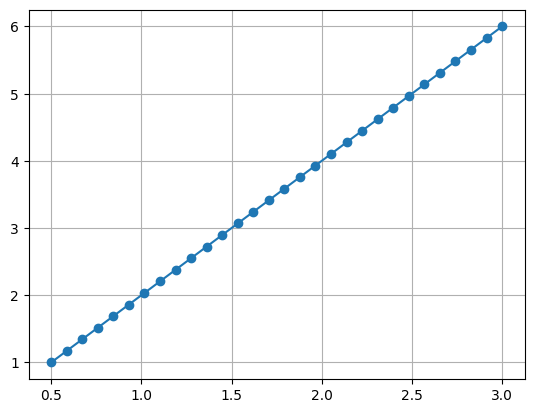

In [28]:
def f(x, gamma, mu=2.345):
    return gamma / ((x - mu)**2 + gamma**2)

# Function to calculate FWHM for a given gamma
def calculate_fwhm(gamma):
    mu = 2.345
    max_value = f(mu, gamma)
    half_max = max_value / 2

    def equation(x):
        return f(x, gamma) - half_max

    x1 = fsolve(equation, mu - gamma)[0]
    x2 = fsolve(equation, mu + gamma)[0]

    return abs(x2 - x1)

# Generate gamma values
gamma_values = np.linspace(0.5, 3, 30)
fwhm_values = [calculate_fwhm(gamma) for gamma in gamma_values]

# Plot FWHM vs. gamma
plt.plot(gamma_values, fwhm_values, marker='o')
plt.grid()
plt.show()

5.3) (Optional) Prove the relation you found in 5.2)